In [1]:
import re
import pandas as pd 
import numpy as np 


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
import string

In [3]:
import nltk
import warnings 

In [4]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [36]:
data  = pd.read_csv(r"C:\Users\DELL\Desktop\Project\dataset4.csv" )


In [37]:
data.head()

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [38]:
data.drop(["SentimentSource"], axis = 1, inplace = True) 

In [39]:
data.columns = ['id', 'label', 'tweet'] 

In [40]:
data.head()

,id,label,tweet
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [41]:
data['tweet'] = data['tweet'].str.replace("[^a-zA-Z#]", " ")
 

In [42]:
tokenized_tweet = data['tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                  [is, so, sad, for, my, APL, friend]
1                 [I, missed, the, New, Moon, trailer]
2                               [omg, its, already, O]
3    [Omgaga, Im, sooo, im, gunna, CRy, I, ve, been...
4       [i, think, mi, bf, is, cheating, on, me, T, T]
Name: tweet, dtype: object

In [43]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0                  [is, so, sad, for, my, apl, friend]
1                   [I, miss, the, new, moon, trailer]
2                                [omg, it, alreadi, O]
3    [omgaga, Im, sooo, im, gunna, cri, I, ve, been...
4          [i, think, mi, bf, is, cheat, on, me, T, T]
Name: tweet, dtype: object

In [44]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

data['tweet'] = tokenized_tweet

In [45]:
data.head()

,id,label,tweet
0,1,0,is so sad for my apl friend
1,2,0,I miss the new moon trailer
2,3,1,omg it alreadi O
3,4,0,omgaga Im sooo im gunna cri I ve been at thi d...
4,5,0,i think mi bf is cheat on me T T


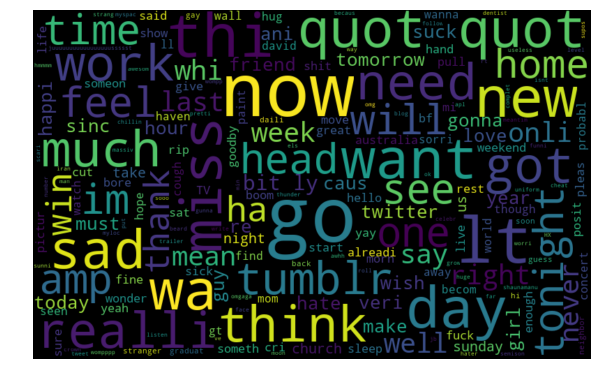

In [46]:
all_words = ' '.join([text for text in data['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

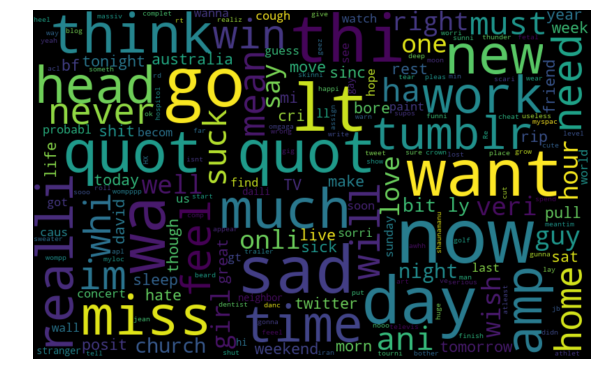

In [49]:
negative_words =' '.join([text for text in data['tweet'][data['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

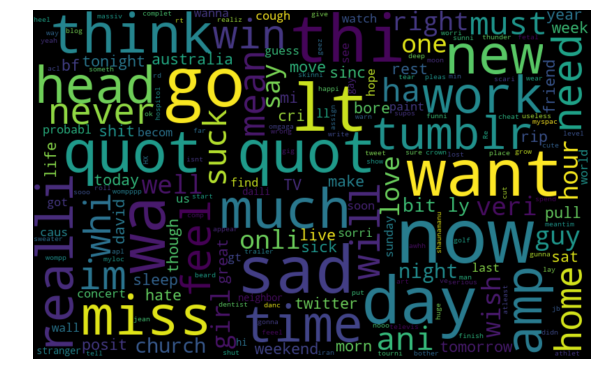

In [50]:
normal_words = ' '.join([text for text in data['tweet'][data['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()